# Modelos de clasificación

portfolio de Nicolau Freitas

### Objeto de estudio:

En este fichero hice el uso de cuatro diferentes modelos de clasificación para hacer una conparación entre ellos. Los modelos utilizados serán:
* Decision Tree
* K-Nearest Neighbors
* Logistic Regression
* Support Machine Vector

En todos los modelos utilizaré en GridSearchVC para eligir los mejores hyperparametros.

#### Evaluación de los modelos:

Los modelos serán evaluados según su precisión y una matriz de confusión será plotada para cada modelo para visualizar si los modelos son mejores en predicir aprovaciones o suspensiones.

#### La base de datos:

La base de datos utilizada referense a puntuación de alumnos en matemáticas, lectura y escritura. Utilizaré los modelos para intentar predecir si los alumnos aproban o no en matemáticas, considerando como criterio que para aprobar sería necesária una nota igual o superior a 70.

Esta base de datos se obtuvo en la página Kaggle:
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [18]:
import pandas as pd
import numpy as np

In [19]:
data = pd.read_csv(r'C:\NPF\Data Science\DataSets\StudentsPerformance.csv')

In [20]:
data.shape

(1000, 8)

In [21]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Para efectos de esta analisis voy a crear una nueva columna en la tabla simplificando las notas de matematicas en 0 y 1. 1 para notas iguales o superiores a 70 y 0 para las demás

In [22]:
nota = []

for i in data['math score']:
    if i >= 70:
        nota.append(1)
    else:
        nota.append(0)

len(nota)

1000

In [23]:
data['mates'] = nota

In [24]:
data = data.drop('math score', axis=1)

In [25]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
reading score                   int64
writing score                   int64
mates                           int64
dtype: object

In [26]:
X = data[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score', 'writing score']].values

In [27]:
from sklearn import preprocessing

In [28]:
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['female', 'male'])
X[:,0]= le_gender.transform(X[:,0])

le_race = preprocessing.LabelEncoder()
le_race.fit(['group B', 'group C', 'group A', 'group D', 'group E'])
X[:,1] = le_race.transform(X[:,1])

le_parent = preprocessing.LabelEncoder()
le_parent.fit(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'])
X[:,2] = le_parent.transform(X[:,2])

le_lunch = preprocessing.LabelEncoder()
le_lunch.fit(['standard', 'free/reduced'])
X[:,3] = le_lunch.transform(X[:,3])

le_test = preprocessing.LabelEncoder()
le_test.fit(['none', 'completed'])
X[:,4] = le_test.transform(X[:,4])

In [29]:
Y = data['mates']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [32]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(800, 7)
(800,)
(200, 7)
(200,)


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
DT_par ={'criterion':['gini', 'entropy'],
             'max_depth':[4, 5, 6]}

In [35]:
mates_Tree = DecisionTreeClassifier()
Tree_cv = GridSearchCV(mates_Tree, DT_par, scoring='accuracy', cv=4)
Tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6]},
             scoring='accuracy')

In [36]:
best_Tree = Tree_cv.best_estimator_

In [37]:
best_Tree.score(X_test, Y_test)

0.815

In [39]:
from sklearn import metrics

In [41]:
best_Tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [42]:
T_pred = best_Tree.predict(X_test)

In [43]:
print("Precisión del DecisionTrees: ", metrics.accuracy_score(Y_test, T_pred))

DecisionTrees's Accuracy:  0.815


In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
predGCV = best_Tree.predict(X_test)

In [45]:
def plot_confusion_matrix(y,y_predict):
    """this function plots the confusion matrix"""
    

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Valores predictos')
    ax.set_ylabel('Valores reales')
    ax.set_title('Matriz de confusión'); 
    ax.xaxis.set_ticklabels(['no aprobado', 'aprobado']); ax.yaxis.set_ticklabels(['no aprobado', 'aprobado'])

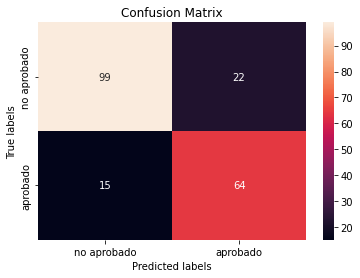

In [46]:
plot_confusion_matrix(Y_test, pred)

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
KNN_par ={'n_neighbors':[4, 5, 6, 7, 8],
             'weights':['uniform', 'distance']}

In [49]:
mates_KNN = KNeighborsClassifier()
KNN_cv = GridSearchCV(mates_KNN, KNN_par, scoring='accuracy', cv=4)
KNN_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6, 7, 8],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [51]:
best_KNN = KNN_cv.best_estimator_

In [52]:
best_KNN.score(X_test, Y_test)

0.8

In [53]:
best_KNN.fit(X_train, Y_train)

KNeighborsClassifier(weights='distance')

In [54]:
KNN_pred = best_KNN.predict(X_test)

In [55]:
print("Precisión del KNN: ", metrics.accuracy_score(Y_test, KNN_pred))

KNN's Accuracy:  0.8


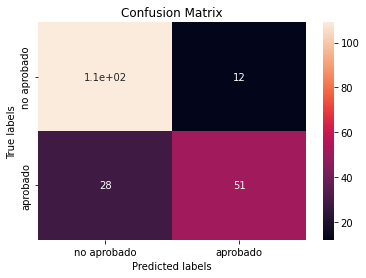

In [56]:
plot_confusion_matrix(Y_test, KNN_pred)

## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression


In [58]:
LR_par ={'C':[0.1, 0.5, 1, 5, 10],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [59]:
mates_LR = LogisticRegression()
LR_cv = GridSearchCV(mates_LR, LR_par, scoring='accuracy', cv=4)
LR_cv.fit(X_train, Y_train)

C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Nicolau\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Nicolau\AppData\Local\Pro

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [60]:
best_LR = LR_cv.best_estimator_

In [61]:
best_LR.score(X_test, Y_test)

0.88

In [62]:
best_LR.fit(X_train, Y_train)

LogisticRegression(C=5, solver='liblinear')

In [63]:
LR_pred = best_LR.predict(X_test)

In [64]:
print("Precisión del Logistic regression: ", metrics.accuracy_score(Y_test, LR_pred))

Logistic regression's Accuracy:  0.88


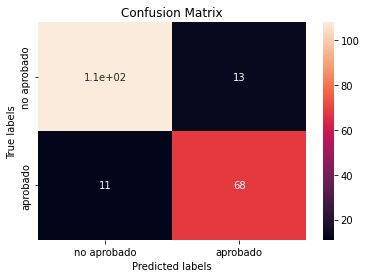

In [65]:
plot_confusion_matrix(Y_test, LR_pred)

## Support Vector Machine

In [66]:
from sklearn import svm


In [69]:
SVM_par ={'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

In [70]:
mates_SVM = svm.SVC()
SVM_cv = GridSearchCV(mates_SVM, SVM_par, scoring='accuracy', cv=4)
SVM_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [71]:
best_SVM = SVM_cv.best_estimator_

In [72]:
best_SVM.score(X_test, Y_test)

0.88

In [73]:
best_SVM.fit(X_train, Y_train)

SVC(kernel='linear')

In [74]:
SVM_pred = best_LR.predict(X_test)

In [75]:
print("Precisión del SVM: ", metrics.accuracy_score(Y_test, LR_pred))

SVM's Accuracy:  0.88


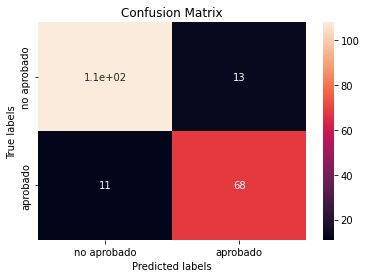

In [76]:
plot_confusion_matrix(Y_test, SVM_pred)

#### Conclusión

La conclusión final es que los modelos Logistic Regression y SVM(Support Machine Vector) han superado a los otros dos modelos. Ambos han tenido una precisión de 88% y presentaron matrices de confusión identicas.